In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct

#statsmodelsはPythonの統計モデル用のライブラリ
import statsmodels.api as sm
import statsmodels.formula.api as smf

from IPython.display import Image

### CSVファイルの読み込み

In [2]:
#CSVファイルの読み込み(dtype未指定)
#fはobject型
data= pd.read_csv("chap3_data.csv")
data.dtypes

y      int64
x    float64
f     object
dtype: object

In [3]:
#CSVファイルの読み込み(dtype指定)
#fはcategory型
data= pd.read_csv("chap3_data.csv", dtype={"y": int,"x":float, "f":"category"})
data.dtypes

y       int64
x     float64
f    category
dtype: object

#### Category型
* 以下のURLを参照
* https://qiita.com/TomokIshii/items/8acb138bd36e1b51b148
* Category型のデータに対しては，cat(categoryの略)アクセサを通して，いくつかの関数（method）がサポートされている

In [4]:
#データの可視化
#dataとprint(data)では出力結果が異なることに注意
data

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C
5,4,8.32,C
6,9,10.61,C
7,9,10.06,C
8,9,9.93,C
9,11,10.43,C


In [5]:
#データの概要表示
data.describe()

,y,x
count,100.000000,100.000000
mean,7.830000,10.089100
std,2.624881,1.008049
min,2.000000,7.190000
25%,6.000000,9.427500
50%,8.000000,10.155000
75%,10.000000,10.685000
max,15.000000,12.400000


### 散布図・箱ひげ図の表示

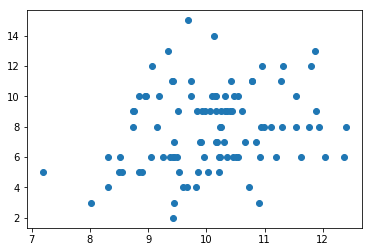

In [6]:
#散布図の表示
#f列の肥料の有無に関しては考慮していない
plt.scatter(data.x, data.y)

In [7]:
#data.f.catはCategoricalAccessorを返す
data.f.cat

In [8]:
#data.f.catの"中身"
data.f.cat.categories

Index(['C', 'T'], dtype='object')

In [9]:
#data.f.cat.codesは0,1を返す
data.f.cat.codes

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
     ..
70    1
71    1
72    1
73    1
74    1
75    1
76    1
77    1
78    1
79    1
80    1
81    1
82    1
83    1
84    1
85    1
86    1
87    1
88    1
89    1
90    1
91    1
92    1
93    1
94    1
95    1
96    1
97    1
98    1
99    1
Length: 100, dtype: int8

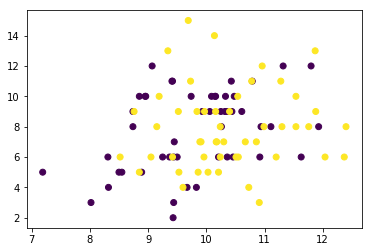

In [10]:
#codesで色分けした結果
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Categorical.html
plt.scatter(data.x, data.y, c=data.f.cat.codes)

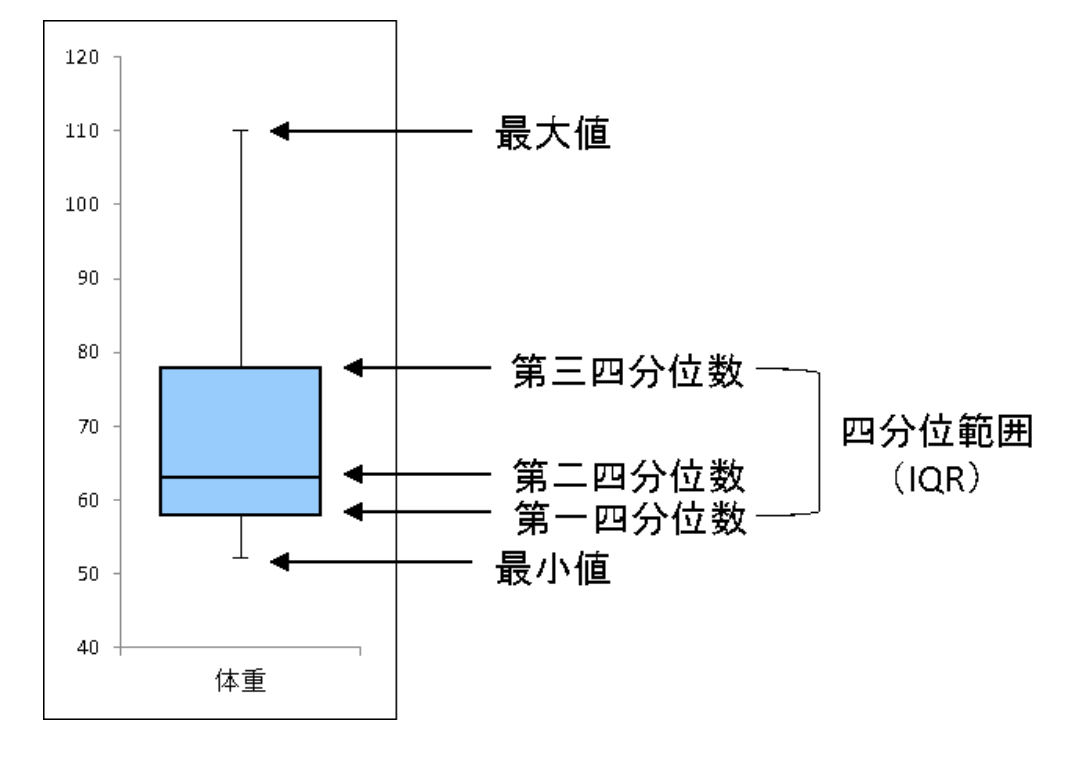

In [11]:
#箱ひげ図の見方
Image("hakohige.png")

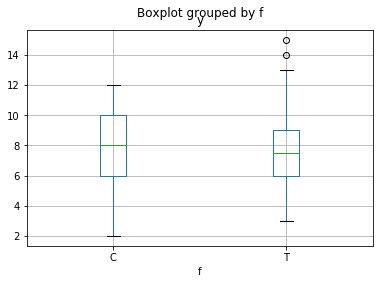

In [12]:
#箱ひげ図の表示
#CとTで大きな差はないことがわかる
data.boxplot(column='y',by='f')

### GLMでの最尤推定の実施
* 最小二乗法もロジスティック分析もGLMの一種
* 各種子数yがポアソン分布に従うと仮定する
* λの分布として以下を仮定し、*β1*および*β2*を求める
* *log λ1 = β1 + β2 * x*

In [14]:
#yとxでGLMの最尤推定を実施した結果
#GLM:一般化線形モデル
#GLMM:一般化線形混合モデル
#Statsmodelsを用いたGLMのリンク先は以下
#https://qiita.com/ground0state/items/38123b70c152253befe4

#formula:線形予測子
formula = 'y ~ x'

#data:データ
#これはそのまま
data = data

#family:誤差構造
#名前に誤差が入っているが実際には統計モデルの従う確率分布
#動きとしてはPoisson()ではデフォルトでlogが指定されている
family = sm.families.Poisson()

model = smf.glm(formula=formula, data=data, family=family)

In [15]:
#coefのinterceptがbeta1
#coefのxがbeta2

#作成したmodelのfit()⇛summary()で予測 
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Thu, 20 Feb 2020   Deviance:                       84.993
Time:                        18:09:34   Pearson chi2:                     83.8
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

In [16]:
#最大対数尤度
result.llf

-235.38625076986077

In [17]:
#自由度
#beta1はカウントされないことに注意
result.df_model

1

In [25]:
#yとfでGLMの最尤推定を実施した結果
formula = 'y ~ f'
data = data
family = sm.families.Poisson()
model = smf.glm(formula=formula, data=data, family=family)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Thu, 20 Feb 2020   Deviance:                       89.475
Time:                        18:30:48   Pearson chi2:                     87.1
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0516      0.051     40.463      0.000       1.952       2.151
f[T.T]         0.0128      0.071      0.179      0.858      -0.127       0.153
==============================================================================
"""

In [26]:
#最大対数尤度は下がっているためあてはまりは悪い
result.llf

-237.62725696068685

In [27]:
#自由度は1のまま
result.df_model

1

In [21]:
#yとxとfでGLMの最尤推定を実施した結果
formula = 'y ~ x + f'
data = data
family = sm.families.Poisson()
model = smf.glm(formula=formula, data=data, family=family)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Thu, 20 Feb 2020   Deviance:                       84.808
Time:                        18:29:05   Pearson chi2:                     83.8
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2631      0.370      3.417      0.001       0.539       1.988
f[T.T]        -0.0320      0.074     -0.430      0.667      -0.178       0.114
x              0.0801      0.037      2.162      0.031       0.007       0.153
==============================================================================
"""

In [22]:
#最大対数尤度はわずかに増加しているためあてはまりは良くなっている
result.llf

-235.29371924249367

In [23]:
#自由度はたしかに1->2になっている
result.df_model

2